In [59]:
# Importing all pakages that necessary.

# loading pandas and numpy for data cleaning and exploratory anaysis.

import pandas as pd
from pandas import DataFrame
import numpy as np
#import matplotlib.plt as plt
# Defining the dataset's new name in this project.
salary_file_path = '/home/anurag/ML/NBA_Salaries/2017-18_NBA_salary.csv'
salary_data = pd.read_csv(salary_file_path)
salary_data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [3]:
# make copy to avoid changing original data when imputing.

copy_data = salary_data.copy()

In [4]:
# Firstly, we should have a look whether the data is completed or not.
# Because the missing value will have an adverse impact on the building of regression model.

null_values_col = copy_data.isnull().sum()
#print(null_values_col)
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head()

,variable,number of missing
0,TOV%,2
1,FTr,2
2,3PAr,2
3,TS%,2


In [5]:
# using median value of each column to fill the N/A values, because it will not be influened by outliers.

def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

fillWithMedian(copy_data)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,...,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,...,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,...,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,...,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,...,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3


In [6]:
copy_data.isnull().any()

Player             False
Salary             False
NBA_Country        False
NBA_DraftNumber    False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                False
3PAr               False
FTr                False
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%               False
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool

In [7]:
# read the data

copy_data.head(10)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,...,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,...,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,...,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,...,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,...,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3


In [8]:
copy_data.columns

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [22]:
#print(len(copy_data))
copy_data.describe()

485


,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,...,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,6.636507e+06,29.451546,26.263918,50.167010,1154.142268,13.260825,0.535427,0.337419,0.263270,4.873814,...,13.137732,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,0.598763
std,7.392602e+06,21.125760,4.272297,24.874872,811.357419,8.769280,0.112121,0.226425,0.293976,4.582810,...,6.102780,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,1.245653
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000
25%,1.471382e+06,11.000000,23.000000,29.000000,381.000000,9.800000,0.506000,0.167000,0.155000,1.800000,...,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,-0.100000
50%,3.202217e+06,25.000000,26.000000,59.000000,1134.000000,13.200000,0.545000,0.346000,0.231000,3.200000,...,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,0.100000
75%,1.000000e+07,47.000000,29.000000,71.000000,1819.000000,16.500000,0.582000,0.480000,0.319000,7.000000,...,15.700000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,0.900000
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,...,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


In [10]:
# Matplotlib package for visualisation.

import matplotlib.pyplot as plt

copy_data.Salary.hist(bins=20, alpha=0.5)
plt.title("NBA Players' Salaries in 2017-18 Season Histogram")
plt.xlabel("Salary($)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

In [11]:
# Extracting two columns: Salary and NBA_Country.
# sample variance - Why does Bessel's correction use N-1?
# https://en.wikipedia.org/wiki/Bessel%27s_correction#Proof_of_correctness_-_Alternate_3

# covariance
# https://blog.csdn.net/guomutian911/article/details/43317019

inf_data = pd.read_csv(salary_file_path,usecols=[2,1])
inf_data.head(10)

,Salary,NBA_Country
0,815615,China
1,3477600,Georgia
2,12307692,USA
3,3202217,USA
4,3057240,USA
5,1312611,USA
6,74159,USA
7,46080,Canada
8,12016854,USA
9,1435750,Spain


In [14]:
usa_data = inf_data[inf_data['NBA_Country'] == 'USA']
#print(usa_data)
non_usa_data = inf_data[inf_data['NBA_Country'] != 'USA']
u_data = usa_data[['Salary']] 
n_data = non_usa_data[['Salary']]

In [21]:
u_mean = u_data.mean()
n_mean = n_data.mean()
u_stdev = u_data.std()
n_stdev = n_data.std()
u_count = u_data.count()
n_count = n_data.count()
print(u_count , n_count)
degree_of_freedom = u_count + n_count - 2
print(degree_of_freedom)

Salary    374
dtype: int64 Salary    111
dtype: int64
Salary    483
dtype: int64


In [16]:
standard_error = (u_stdev**2/u_count + n_stdev**2/n_count)**0.5
t_statistics = (u_mean - n_mean)/standard_error
print('the t-statistics is: {}'.format(t_statistics))
print('the degree of freedom is: {}'.format(degree_of_freedom))

the t-statistics is: Salary   -0.703287
dtype: float64
the degree of freedom is: Salary    483
dtype: int64


In [23]:
# Bayes Theorem
#Q- Bayes Theorem is the fundamental concept of probability. Here we can apply it to answer the question such as “what is the probability that players’ salaries are higher than 10 million dollars, given that the player is from USA?”

usa_list = u_data['Salary'].values.tolist()
#print(len(usa_list))
non_usa_list = n_data['Salary'].values.tolist()

usa_count = u_data['Salary'].count()
#print(usa_count)
non_usa_count = n_data['Salary'].count()

usa_10m_count = 0
non_usa_10m_count = 0

for i in usa_list:
    if i > 10000000:
        usa_10m_count += 1

for i in non_usa_list:
    if i > 10000000:
        non_usa_10m_count += 1

# P(a|b) = (P(b|a))*P(a)/P(b)

probability = (usa_10m_count/(usa_10m_count+non_usa_10m_count)) * ((usa_10m_count + non_usa_10m_count)/
               (usa_count + non_usa_count)) / (usa_count/(usa_count + non_usa_count))
print(probability)

374
0.23262032085561493


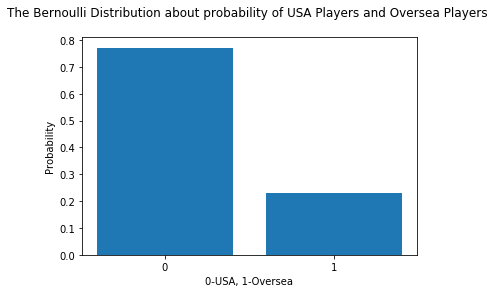

In [25]:
# Bernoulli distribution

u_country = usa_data[['NBA_Country']] 
n_country = non_usa_data[['NBA_Country']]
bernoulli_count = [int(u_country.count()), int(n_country.count())]
#print(bernoulli_count)
u_probability = bernoulli_count[0]/(bernoulli_count[0] + bernoulli_count[1])
n_probability = bernoulli_count[1]/(bernoulli_count[0] + bernoulli_count[1])

# Define the dataset
probability = [u_probability, n_probability]
bars = ('0', '1')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, probability)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.title("The Bernoulli Distribution about probability of USA Players and Oversea Players \n")
plt.xlabel("0-USA, 1-Oversea")
plt.ylabel("Probability")
plt.show()

/home/anurag/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


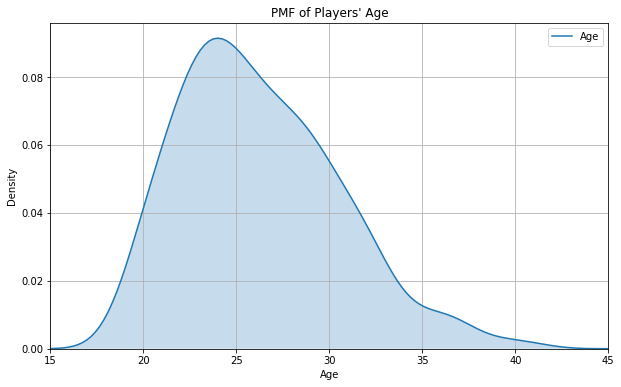

In [23]:
# probability mass function, S-total = 1
# When variables are continous, it becomes Probability Denstiy Function.

import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(copy_data.Age, shade=True)
plt.xlim((15,45))
plt.title("PMF of Players' Age")
plt.ylabel("Density")
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [24]:
# Selecting Features

print(copy_data.columns)

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')


In [27]:
# Creating Features
# buiding binary categories in order to make classifications prediction
# normal-0, star-1

conditions = [
    (copy_data['Salary'] < 10000000)]
choices = [0]
copy_data['Binary'] = np.select(conditions, choices, default=1)
copy_data.head(10)

# copy_data.drop(['USA/NOT'], axis=1, inplace=True)

# Then we build nomial categories
# 0 - edge players
# 1 - normal players
# 2 - all stars
# 3 - superstars

conditions = [
        (copy_data['Salary'] < 5000000),
        (copy_data['Salary'] <= 10000000),
        (copy_data['Salary'] <= 20000000)]
choices = [0, 1, 2]
copy_data['Nominal'] = np.select(conditions, choices, default=3)
copy_data.head(10)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Binary,Nominal
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,0,0
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0,0
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,1,2
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,0,0
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,0,0
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,...,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6,0,0
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,...,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0,0,0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,...,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3,0,0
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,...,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5,1,2
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,...,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3,0,0


In [28]:
color_wheel = {0: "#0392cf", 
               1: "#7bc043"}
colors = copy_data['Binary'].map(lambda x: color_wheel.get(x))
print(copy_data.Binary.value_counts())
p=copy_data.Binary.value_counts().plot(kind="bar")

0    363
1    122
Name: Binary, dtype: int64


In [32]:
colors = copy_data['Nominal'].map(lambda x: color_wheel.get(x))
print(copy_data.Nominal.value_counts())
p=copy_data.Nominal.value_counts().plot(kind="pie")

0    288
2     80
1     78
3     39
Name: Nominal, dtype: int64


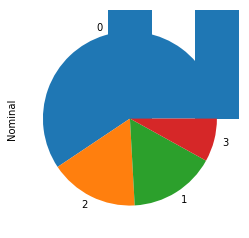

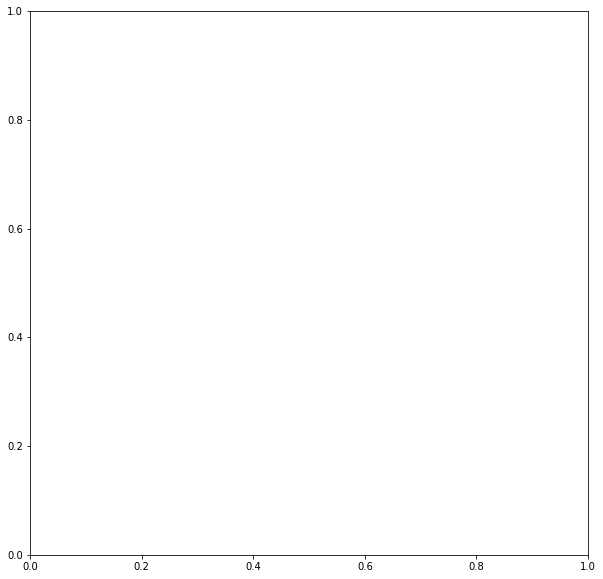

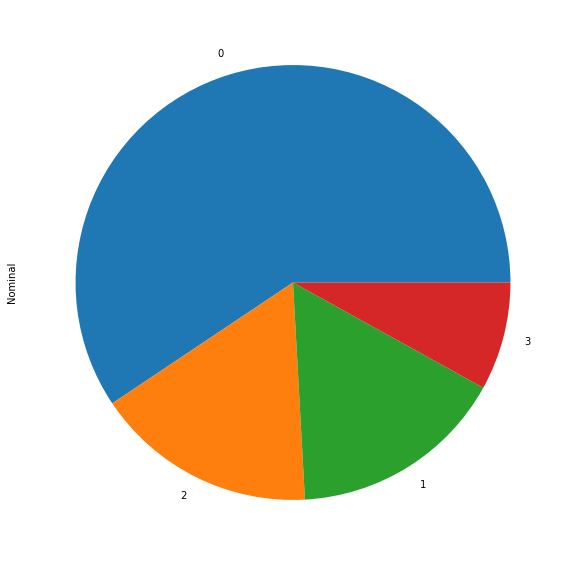

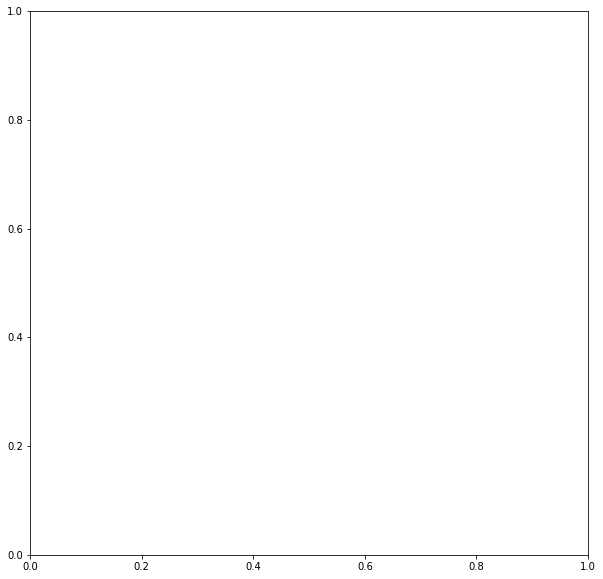

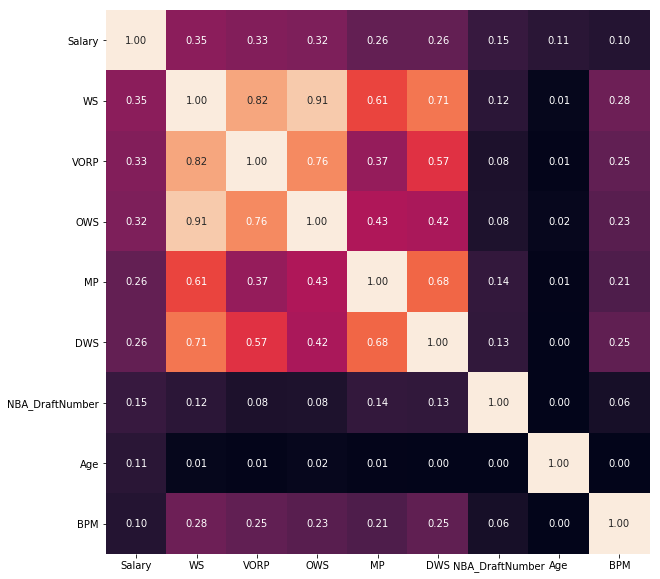

In [34]:
import seaborn as sns
df = DataFrame(copy_data,columns=['Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'])

'''
pandas.DataFrame.corr
method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

min_periods : int, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation
'''

corrmat = df.corr(method='pearson', min_periods=1)
r_square = corrmat ** 2

## Top 8 correlated variables
k = 9 #number of variables for heatmap
cols = r_square.nlargest(k, 'Salary')['Salary'].index
cm = df[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
cm_square.columns

Index(['Salary', 'WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age',
       'BPM'],
      dtype='object')

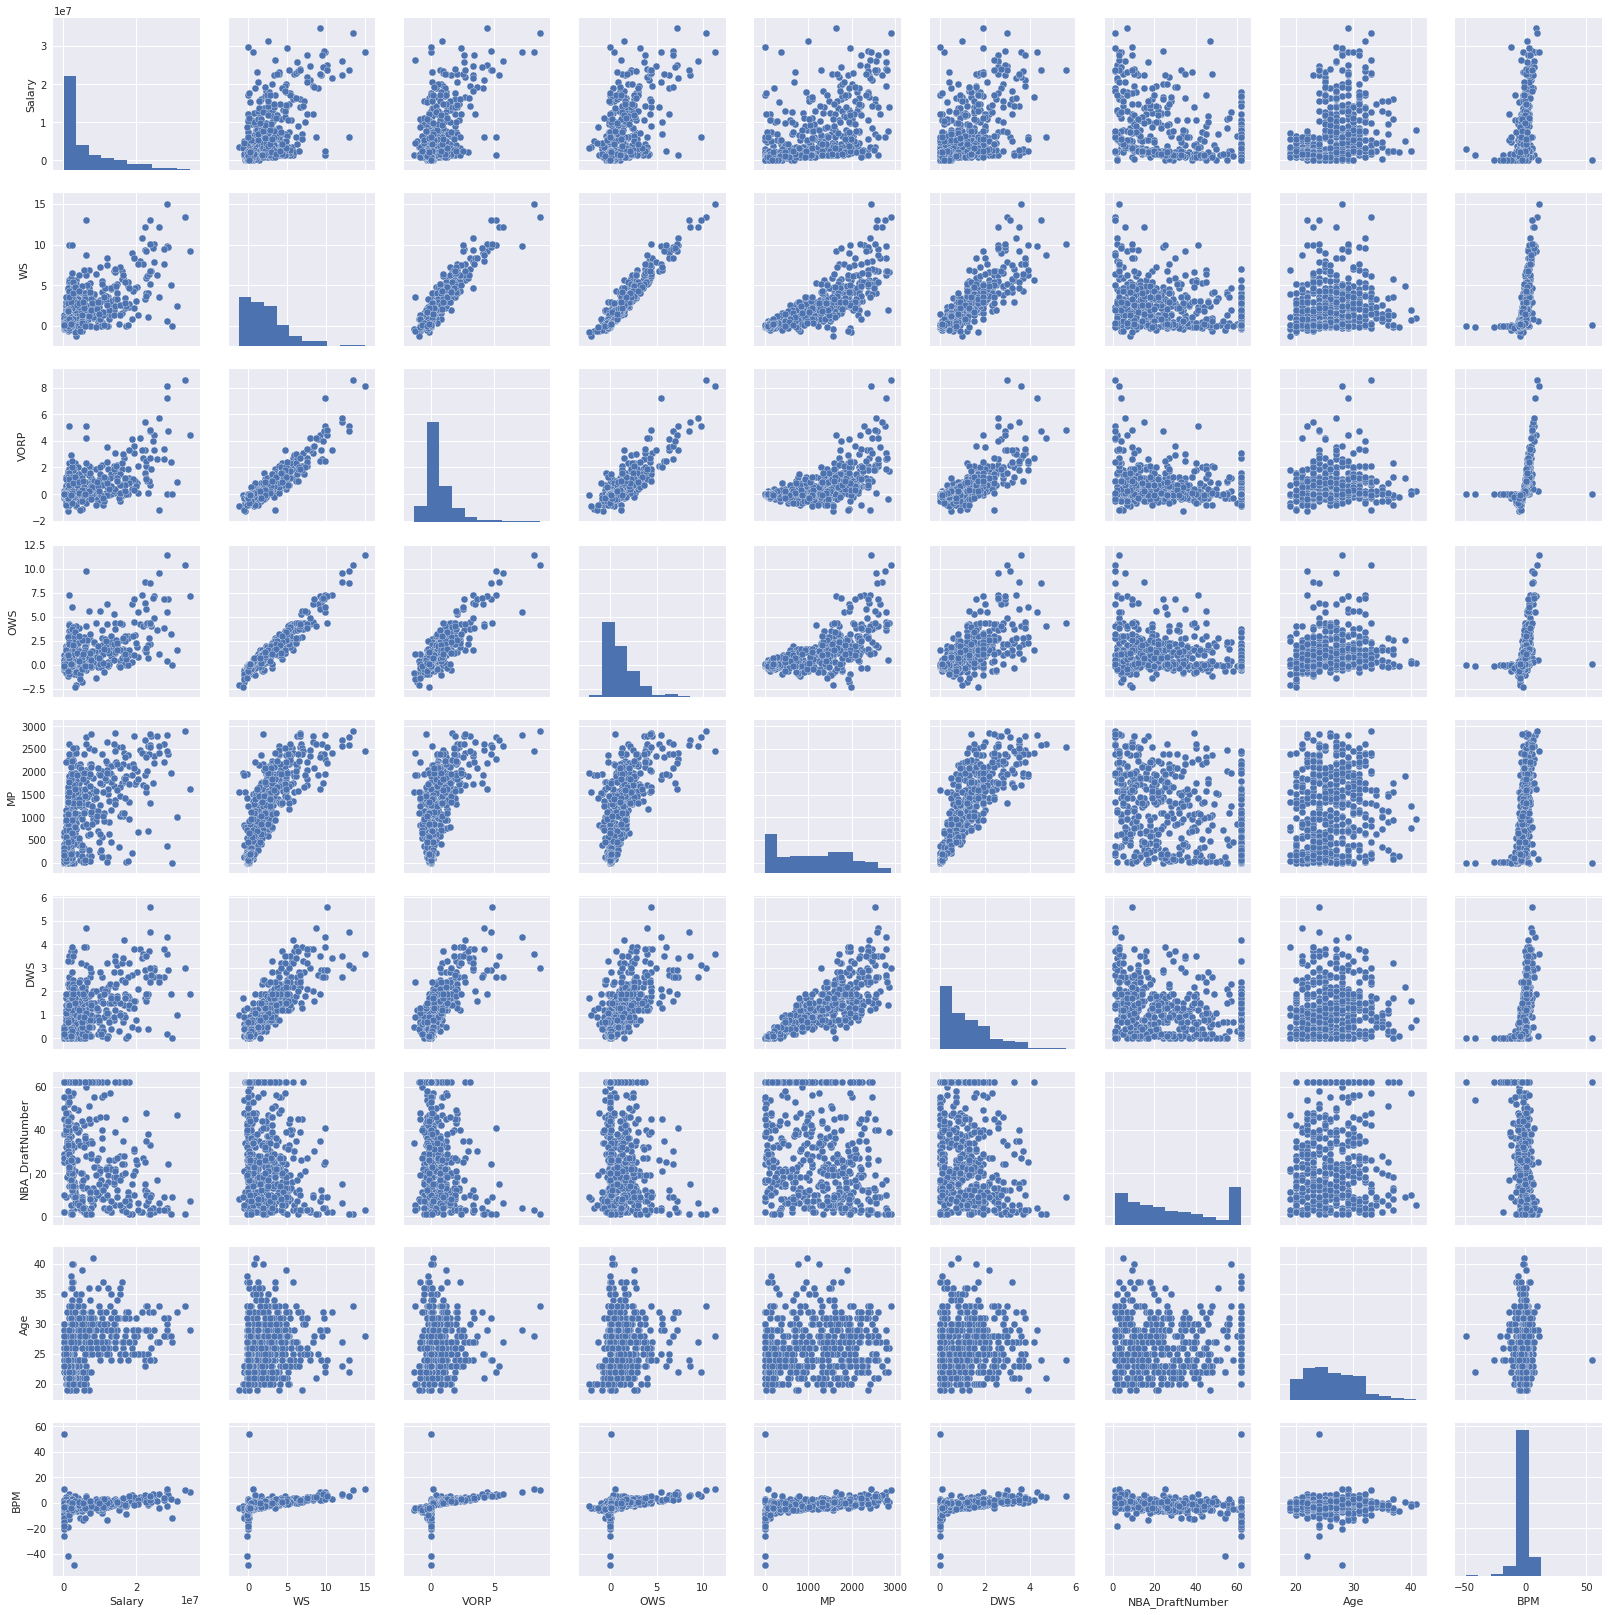

In [36]:
# Using scatter plots to detect the correlation value

variables = ['Salary', 'WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age', 'BPM']

sns.set()
sns.pairplot(df[variables], size = 2.5)
plt.show()

In [37]:
# https://etav.github.io/python/vif_factor_python.html
# https://onlinecourses.science.psu.edu/stat501/node/347/

x = df[['WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age', 'BPM']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,4773.4,WS
1,8.3,VORP
2,1868.2,OWS
3,12.2,MP
4,893.2,DWS
5,3.3,NBA_DraftNumber
6,7.5,Age
7,1.5,BPM


In [38]:
x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,3.2,NBA_DraftNumber
1,5.4,Age
2,2.7,WS
3,1.5,BPM


In [39]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [41]:
from sklearn.model_selection import train_test_split

x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Salary']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [67]:
# Cross Validation

# Spliting dataset into three parts, for training, validation, and testing respectively.

x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)
#print(x_train)

In [43]:
print("the number of data for training:")
print(y_train.count())
print("the number of data for validation:")
print(y_val.count())
print("the number of data for testing:")
print(y_test.count())

the number of data for training:
Salary    291
dtype: int64
the number of data for validation:
Salary    97
dtype: int64
the number of data for testing:
Salary    97
dtype: int64


In [44]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

print(rmse_model(linear_regression, x_test, y_test))
print(linear_regression.coef_)
print(linear_regression.intercept_)

4508432.243951645
[[ -71799.85650873  478944.20584276 1505350.67144101  -28969.978771  ]]
[-7254368.84624032]


degree = 1, training RMSE = 5407757.28, validation RMSE = 6182715.55
degree = 2, training RMSE = 4885065.73, validation RMSE = 6033258.85
degree = 3, training RMSE = 4681446.45, validation RMSE = 6239619.83
degree = 4, training RMSE = 4272735.32, validation RMSE = 10301083.81
degree = 5, training RMSE = 3374339.16, validation RMSE = 119763067.87
degree = 6, training RMSE = 2203697.63, validation RMSE = 742808921.86
degree = 7, training RMSE = 890372.27, validation RMSE = 411957397676.54


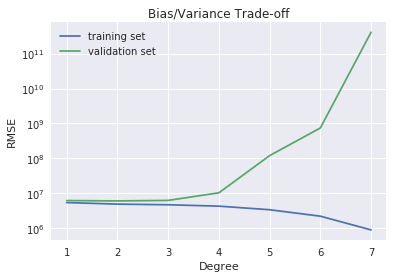

In [45]:
# Bias-Variance Trade-off

from sklearn.preprocessing import PolynomialFeatures

train_rmses = []
val_rmses = []
degrees = range(1,8)

for i in degrees:
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    
    # training RMSE
    y_train_pred = poly_reg.predict(x_train_poly)
    train_poly_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    train_rmses.append(train_poly_rmse)
    
    # validation RMSE
    x_val_poly = poly.fit_transform(x_val)
    y_val_pred = poly_reg.predict(x_val_poly)
    
    val_poly_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_rmses.append(val_poly_rmse)

    print('degree = %s, training RMSE = %.2f, validation RMSE = %.2f' % (i, train_poly_rmse, val_poly_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, train_rmses,label= 'training set')
ax.plot(degrees, val_rmses,label= 'validation set')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Bias/Variance Trade-off')  
plt.legend()
plt.show()

In [48]:
# RMSE for testing data

second_poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = second_poly.fit_transform(x_train)

second_reg = LinearRegression()
second_reg.fit(x_train_poly, y_train)

x_test_second_poly = second_poly.fit_transform(x_test)
y_test_pred = second_reg.predict(x_test_second_poly)

print(rmse_model(second_reg, x_test_second_poly, y_test))
print(second_reg.coef_)
print(second_reg.intercept_)

4136581.430330957
[[-4.14637124e+05  4.93441473e+06 -2.28210378e+06 -4.58754805e+05
   1.44627259e+03  8.95955303e+03 -9.23160528e+03  2.36929111e+03
  -8.87674773e+04  1.23912801e+05  1.37063091e+04  4.83339384e+04
   1.98777225e+04 -6.83788651e+02]]
[-59198600.26031464]


In [68]:
# At first, we calculate the RMSE before regularization.

poly = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly.fit_transform(x_train)

poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

x_test_poly = poly.fit_transform(x_test)
y_test_pred = poly_reg.predict(x_test_poly)

print(rmse_model(poly_reg, x_test_poly, y_test))

128255850.4147069


In [49]:
# Ridge

# https://blog.csdn.net/hzw19920329/article/details/77200475
# https://www.kaggle.com/sflender/comparing-lin-regression-ridge-lasso
# https://www.kaggle.com/junyingzhang2018/ridge-regression-score-0-119

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

rmse=[]
alpha=[1, 2, 5, 10, 20, 30, 40, 50, 75, 100]

for a in alpha:
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[7817013.188432574, 7528017.670333543, 7124891.625036975, 6910231.5060111135, 6817935.197959063, 6816889.772884506, 6837096.170245907, 6863858.844695565, 6935241.748997738, 7001350.273030885]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.617111e-17
  overwrite_a=True).T
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.310897e-17
  overwrite_a=True).T


In [51]:
# Adjust alpha based on previous result

alpha=np.arange(20, 60, 2)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)


[6817935.197959063, 6814415.814248239, 6812996.082294513, 6813164.756409142, 6814553.196282906, 6816889.772884506, 6819970.534598954, 6823639.797503659, 6827776.9781656135, 6832287.46578522, 6837096.170245907, 6842142.878322673, 6847378.862599862, 6852764.364599228, 6858266.704083578, 6863858.844695565, 6869518.286400756, 6875226.209088563, 6880966.797494129, 6886726.711763094]


In [52]:
# Adjust alpha based on previous result

alpha=np.arange(20, 30, 0.2)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[6817935.197959063, 6817470.195671651, 6817032.349363321, 6816620.848094199, 6816234.911245991, 6815873.786121681, 6815536.746704992, 6815223.093375731, 6814932.150229938, 6814663.267181289, 6814415.814248239, 6814189.184666548, 6813982.792616997, 6813796.071349167, 6813628.474192693, 6813479.472343588, 6813348.5547873145, 6813235.227215111, 6813139.011952384, 6813059.445958985, 6812996.082294513, 6812948.488206103, 6812916.243797843, 6812898.943978577, 6812896.195148632, 6812907.616685273, 6812932.839841836, 6812971.50646449, 6813023.270442992, 6813087.79589788, 6813164.756409142, 6813253.836382864, 6813354.729077288, 6813467.13707364, 6813590.771554419, 6813725.352113315, 6813870.60696316, 6814026.271739328, 6814192.089858695, 6814367.812243944, 6814553.196282906, 6814748.00682642, 6814952.015454153, 6815164.999736044, 6815386.743085487, 6815617.035805962, 6815855.67312739, 6816102.456395841, 6816357.192067871, 6816619.691936062]


In [53]:
# Use alpha=40.4 to predict the test data

ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=24.6))
ridge_model = ridge.fit(x_train, y_train)

predictions = ridge_model.predict(x_test)
print("Ridge RMSE is: " + str(rmse_model(ridge_model, x_test, y_test)))

Ridge RMSE is: 32093519.46680343


In [54]:
# Lasso

# https://www.kaggle.com/sflender/comparing-lin-regression-ridge-lasso

from sklearn.linear_model import Lasso

rmse=[]
alpha=[0.0001, 0.001, 0.01, 0.1, 1]

for a in alpha:
    lasso=make_pipeline(PolynomialFeatures(4), Lasso(alpha=a))
    lasso.fit(x_train, y_train)
    predict=lasso.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

[6691949.362879823, 6691949.365290645, 6691949.389399016, 6691949.630482741, 6691952.04132588]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [55]:
lasso = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.0001))
lasso_model = lasso.fit(x_train, y_train)
predictions = lasso_model.predict(x_test)
print("RMSE in Testing : " + str(rmse_model(lasso_model, x_test, y_test)))

RMSE in Testing : 10261503.616564466


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [56]:
# ElasticNet

# https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions

from sklearn.linear_model import ElasticNet, ElasticNetCV

rmse=[]
alpha=[0.000001, 0.00001, 0.0001, 0.001,0.01,0.1]

for a in alpha:
    elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=a))
    elasticnet.fit(x_train, y_train)
    predict=elasticnet.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
                             
print(rmse)
plt.scatter(alpha, rmse)

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

[6691951.268951092, 6691968.424277898, 6692139.806838652, 6693836.6888700975, 6709234.924996459, 6783234.741187589]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [70]:
# ElasticNet

# https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions

from sklearn.linear_model import ElasticNet, ElasticNetCV

rmse=[]
alpha=[0.000001, 0.00001, 0.0001, 0.001,0.01,0.1]

for a in alpha:
    elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=a))
    elasticnet.fit(x_train, y_train)
    predict=elasticnet.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
                             
print(rmse)
plt.scatter(alpha, rmse)

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

[6691951.268951092, 6691968.424277898, 6692139.806838652, 6693836.6888700975, 6709234.924996459, 6783234.741187589]


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [71]:
# Comparison

print("For testing dataset\n")

print("Linear RMSE is: " + str(rmse_model(linear_regression, x_test, y_test)))
print("2nd Polynomial RMSE is: " + str(rmse_model(second_reg, x_test_second_poly, y_test)))

print("\nFor 4th order polynomial (RMSE = 128255850.32699986 before regualarization)")
print("Ridge RMSE is: " + str(rmse_model(ridge_model, x_test, y_test)))
print("Lasso RMSE is: " + str(rmse_model(lasso_model, x_test, y_test)))
print("ElasticNet RMSE is: " + str(rmse_model(elasticnet_model, x_test, y_test)))

For testing dataset

Linear RMSE is: 4508432.243951645
2nd Polynomial RMSE is: 4136581.430330957

For 4th order polynomial (RMSE = 128255850.32699986 before regualarization)
Ridge RMSE is: 32093519.46680343
Lasso RMSE is: 10261503.616564466


NameError: name 'elasticnet_model' is not defined

In [61]:
data = np.array([['','Parameter','RMSE'],
                ['1st-order Poly',1,4508432.2],
                ['2nd-order Poly',2,4136581.4],
                ['4nd-order Poly',4,128255850.3],
                ['4nd-order Lasso','<0.0001',10261503.6],
                ['4nd-order Ridge',24.6,32093519.5],
                ['4nd-order ElasticNet','<0.0001',10261504.7]])
                
regression_comparison = pd.DataFrame(data=data[1:,1:],
                                      index=data[1:,0],
                                    columns=data[0,1:])
regression_comparison

,Parameter,RMSE
1st-order Poly,1,4508432.2
2nd-order Poly,2,4136581.4
4nd-order Poly,4,128255850.3
4nd-order Lasso,<0.0001,10261503.6
4nd-order Ridge,24.6,32093519.5
4nd-order ElasticNet,<0.0001,10261504.7


In [62]:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

my_ridge = Ridge(alpha = 24.6, normalize = True)
my_ridge.fit(x_train, y_train) 
#pd.Series(my_ridge.coef_,index = ['NBA_DraftNumber', 'Age', 'WS', 'BPM'])
my_ridge.coef_

array([[-5063.8823843 , 23745.62461498, 69180.1194312 , 14071.36231572]])

In [63]:
my_lasso = Lasso(alpha = 0.0001, normalize = True)
my_lasso.fit(x_train, y_train) 
my_lasso.coef_

array([ -71799.85643407,  478944.20547638, 1505350.67035793,
        -28969.97816668])

In [64]:
my_elasticnet = ElasticNet(alpha = 0.0001, normalize = True)
my_elasticnet.fit(x_train, y_train) 
my_elasticnet.coef_

array([ -71487.33915305,  473914.28999172, 1478049.57849671,
        -22200.94106611])

In [65]:
#https://www.zhihu.com/question/38121173

data = np.array([['','NBA_DraftNumber','Age', 'WS', 'BPM'],
                ['Ridge',-5063.8823843 , 23745.62461498, 69180.1194312 , 14071.36231572],
                ['Lasso',-71799.85643407,  478944.20547638, 1505350.67035793, -28969.97816668],
                ['ElasticNet',-71487.33915305,  473914.28999172, 1478049.57849672, -22200.94106611]])
                
regularization_comparison = pd.DataFrame(data=data[1:,1:],
                                      index=data[1:,0],
                                    columns=data[0,1:])
regularization_comparison

,NBA_DraftNumber,Age,WS,BPM
Ridge,-5063.8823843,23745.62461498,69180.1194312,14071.36231572
Lasso,-71799.85643407,478944.20547638,1505350.67035793,-28969.97816668
ElasticNet,-71487.33915305,473914.28999172,1478049.57849672,-22200.94106611


In [72]:
# https://www.kaggle.com/pablovargas/naive-bayes-svm-spam-filtering
# for binary target variables

from sklearn import metrics

def confusion_matrix(model, x_test, y_test):
    model_confusion_test = metrics.confusion_matrix(y_test, model.predict(x_test))
    matrix = pd.DataFrame(data = model_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
                 index = ['Actual 0', 'Actual 1'])
    return matrix

In [73]:
# https://www.kaggle.com/pablovargas/naive-bayes-svm-spam-filtering
# for binary target variables

from sklearn import metrics

def confusion_matrix(model, x_test, y_test):
    model_confusion_test = metrics.confusion_matrix(y_test, model.predict(x_test))
    matrix = pd.DataFrame(data = model_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
                 index = ['Actual 0', 'Actual 1'])
    return matrix

In [76]:
print(copy_data.columns)
print(len(copy_data.columns))

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Binary', 'Nominal'],
      dtype='object')
30


In [80]:
df = DataFrame(copy_data,columns=['Binary', 'Nominal', 'Age','NBA_DraftNumber','MP', 'PER', 'TS', '3PAr', 
        'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%','STL%', 'BLK%', 
        'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 
        'DBPM', 'BPM', 'VORP'])
df.head()

,Binary,Nominal,Age,NBA_DraftNumber,MP,PER,TS,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,0,22,43,87,0.6,NaN,0.593,0.370,6.5,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,0,0,33,42,937,16.8,NaN,0.004,0.337,11.0,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,1,2,36,19,1508,17.3,NaN,0.193,0.140,7.0,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,0,0,22,13,656,14.6,NaN,0.346,0.301,1.4,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,0,0,20,10,979,8.2,NaN,0.387,0.146,4.9,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [81]:
x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Binary']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)

In [82]:
#KNN
# Model Tuning

# 5-fold cross validation

from sklearn.model_selection import KFold, cross_val_score

def rmse_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_model.values)
    predictions = model.predict(x_test)
    rmse= np.sqrt(-cross_val_score(model, x_model.values, y_model, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [83]:
# How to find K?

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

train_scores = []
validation_scores = []

x_model_values = x_model.values
y_model_values = y_model.values

# 5-fold cross validation

kfold = KFold(5, shuffle=True, random_state=42)

for i in range(1,20):
    knn = KNeighborsClassifier(i)
    
    tr_scores = []
    va_scores = []
    
    for a, b in kfold.split(x_model_values):

        x_train_fold, y_train_fold = x_model_values[a], y_model_values[a]
        x_val_fold, y_val_fold = x_model_values[b], y_model_values[b]
        
        knn.fit(x_train_fold, y_train_fold.ravel())
        
        va_scores.append(knn.score(x_val_fold, y_val_fold))
        tr_scores.append(knn.score(x_train_fold, y_train_fold))
        
    validation_scores.append(np.mean(va_scores))
    train_scores.append(np.mean(tr_scores))

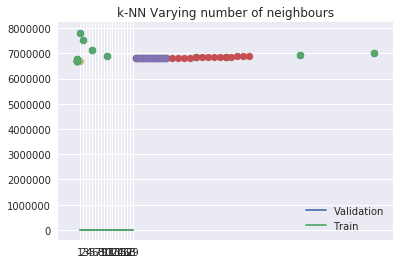

In [84]:
plt.title('k-NN Varying number of neighbours')
plt.plot(range(1,20),validation_scores,label="Validation")
plt.plot(range(1,20),train_scores,label="Train")
plt.legend()
plt.xticks(range(1,20))
plt.show()

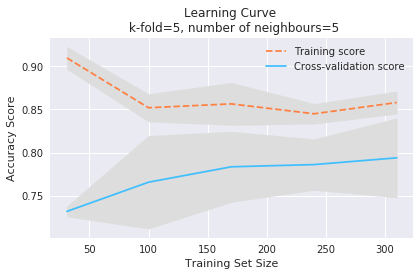

In [85]:
# Learning Curve

# How KNN algorithm performs in both small-size data and big-size data 

# choose an acceptable color
# https://www.spycolor.com/ff8040

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(KNeighborsClassifier(5), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        n_jobs=-1, 
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve \n k-fold=5, number of neighbours=5")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [86]:
# curse of dimensionality

# one or two features are simple, but it cannot recognize and divide our categories. more features means
# more evidence in different dimensions, but it could cause overfitting.

X = df[[ 'Age', 'NBA_DraftNumber','MP', 'PER', '3PAr',
        'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%','STL%', 'BLK%', 
        'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 
        'DBPM', 'BPM', 'VORP']]
Y = df[['Binary']]

X_model, X_test, Y_model, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_model, Y_model, test_size=0.25, random_state=1)

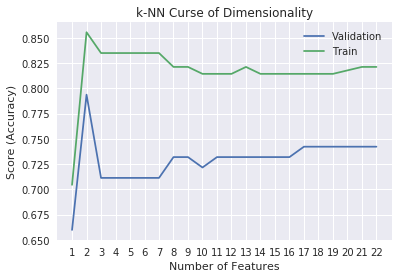

In [87]:
# [:, :2]extract columns

# convert[[1],[2],[3],...] to [1,2,3,4,0]
# x_train_values_list = np.array(x_train_values).tolist() 

'''
y_train_value = [j for i in y_train_values for j in i] - delete sublists to just one list

dimensionality = []
for i in range(10):

a = [item[:, :2] for item in list(x_train_values)]
print(a)
'''

d_train = []
d_val = []

X_train_values = X_train.values
Y_train_values = Y_train.values
X_val_values = X_val.values
Y_val_values = Y_val.values

for i in range(1,23):
    
    X_train_value = X_train_values[:,:i].tolist() #convert dataframe
    X_val_value = X_val_values[:,:i].tolist()
    
    knn = KNeighborsClassifier(5)
    Knn = knn.fit(X_train_value, Y_train_values.ravel())

    d_train.append(Knn.score(X_train_value, Y_train_values))
    d_val.append(Knn.score(X_val_value, Y_val_values))

plt.title('k-NN Curse of Dimensionality')
plt.plot(range(1,23),d_val,label="Validation")
plt.plot(range(1,23),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,23))
plt.show()

In [88]:
# The best result is captured at k = 5 hence it is used for the final model.

#Setup a knn classifier with k neighbors

kfold = KFold(5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(5)

for m,n in kfold.split(x_model_values):
        
        x_train_fold, y_train_fold = x_model_values[m], y_model_values[m]
        
        Knn = knn.fit(x_train_fold, y_train_fold.ravel())

print('When k=5, the testing score(accuracy) is: ')
print(Knn.score(x_test,y_test))

When k=5, the testing score(accuracy) is: 
0.865979381443299


In [89]:
confusion_matrix(Knn, x_test, y_test)

,Predicted 0,Predicted 1
Actual 0,76,4
Actual 1,9,8


In [90]:
#SVM
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

classifier = SVC(gamma = 'auto')
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))

0.9862542955326461
0.7731958762886598


In [91]:
#Tuning

# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
# https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

#from sklearn.model_selection import GridSearchCV

#parameters = {"estimator__gamma":[0.0001, 0.001, 0.01, 0.3, 0.5, 0.1, 2, 5, 10, 100]}
#grid_search = GridSearchCV(svm_model, param_grid=parameters)
#grid_search.fit(x_train, y_train)
#print(grid_search.best_score_)
#print(grid_search.best_params_)

accuracy=[]
gamma=[0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5, 0.1]

for a in gamma:
    classifier = SVC(C=1, 
        kernel='rbf', 
        degree=2, 
        gamma=a, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(gamma, accuracy)

[0.7731958762886598, 0.7938144329896907, 0.7731958762886598, 0.7525773195876289, 0.7731958762886598, 0.7731958762886598, 0.7731958762886598, 0.7835051546391752, 0.7731958762886598]


[0.7731958762886598, 0.7938144329896907, 0.7422680412371134, 0.7938144329896907, 0.8041237113402062, 0.7938144329896907, 0.7628865979381443, 0.7835051546391752, 0.7835051546391752, 0.7835051546391752, 0.7731958762886598, 0.7628865979381443, 0.7525773195876289, 0.7422680412371134, 0.7731958762886598, 0.7628865979381443, 0.7525773195876289]


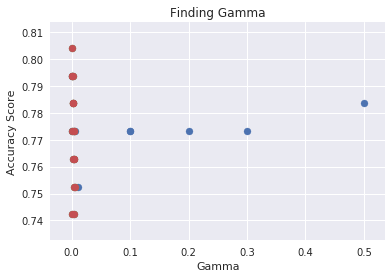

In [92]:
gamma=np.arange(0.0001, 0.005, 0.0003) 
accuracy=[]

for a in gamma:
    classifier = SVC(C=1, 
        kernel='rbf', 
        degree=2, 
        gamma=a, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(gamma, accuracy)
plt.scatter(gamma, accuracy)
plt.title("Finding Gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy Score")
plt.show()

[0.8041237113402062, 0.7835051546391752, 0.7835051546391752, 0.7835051546391752, 0.7628865979381443, 0.7628865979381443, 0.7525773195876289, 0.7422680412371134, 0.7422680412371134]


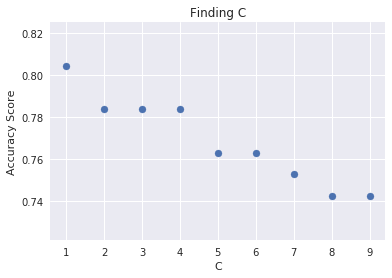

In [93]:
accuracy=[]
C=np.arange(1,10,1) 

for a in C:
    classifier = SVC(C=a, 
        kernel='rbf', 
        degree=2, 
        gamma=0.0013, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(C, accuracy)
plt.title("Finding C")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.show()

In [94]:
classifier = SVC(C=1, # Regularization parameter
        kernel='rbf', # kernel type, rbf working fine here
        degree=2, # default value
        gamma=0.0013, # kernel coefficient
        coef0=1, # change to 1 from default value of 0.0
        shrinking=True, # using shrinking heuristics
        tol=0.5, # stopping criterion tolerance 
        probability=False, # no need to enable probability estimates
        cache_size=200, # 200 MB cache size
        class_weight=None, # all classes are treated equally 
        verbose=False, # print the logs 
        max_iter=-1, # no limit, let it run
        decision_function_shape=None, # will use one vs rest explicitly 
        random_state=None)
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))

0.8006872852233677
0.8041237113402062


In [95]:
print(svm_model.score(x_test,y_test))

0.8969072164948454


In [96]:
# Confusion Matrix

confusion_matrix(svm_model, x_test, y_test)

,Predicted 0,Predicted 1
Actual 0,80,0
Actual 1,10,7


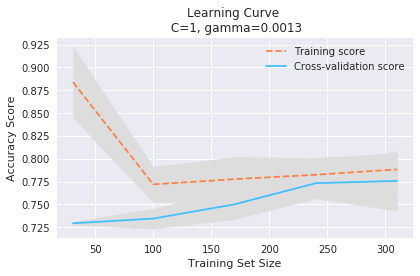

In [97]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(classifier, n_jobs=1), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve \n C=1, gamma=0.0013")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [98]:
# curse of dimensionality

# one or two features are simple, but it cannot recognize and divide our categories. more features means
# more evidence in different dimensions, but it could cause overfitting.

# https://thispointer.com/select-rows-columns-by-name-or-index-in-dataframe-using-loc-iloc-python-pandas/

d_train = []
d_val = []

for i in range(1,23):
    
    X_train_index = X_train.iloc[: , 0:i]
    X_val_index = X_val.iloc[: , 0:i]
    
    classifier = SVC(C=1, # Regularization parameter
                    kernel='rbf', # kernel type, rbf working fine here
                    degree=2, # default value
                    gamma=0.0001, # kernel coefficient
                    coef0=1, # change to 1 from default value of 0.0
                    shrinking=True, # using shrinking heuristics
                    tol=0.5, # stopping criterion tolerance 
                    probability=False, # no need to enable probability estimates
                    cache_size=200, # 200 MB cache size
                    class_weight=None, # all classes are treated equally 
                    verbose=False, # print the logs 
                    max_iter=-1, # no limit, let it run
                    decision_function_shape=None, # will use one vs rest explicitly 
                    random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(X_train_index, Y_train)

    d_train.append(svm_model.score(X_train_index, Y_train))
    d_val.append(svm_model.score(X_val_index, Y_val))

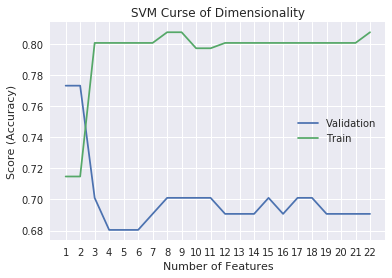

In [99]:
plt.title('SVM Curse of Dimensionality')
plt.plot(range(1,23),d_val,label="Validation")
plt.plot(range(1,23),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,23))
plt.show()

In [100]:
#Naive Bayes
# NB assumes that the features themselves are not correlated to each other. Therefore, if the collinearity of our features are low, the model will perform better.

x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Nominal']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)

In [101]:
# https://medium.com/machine-learning-101/chapter-1-supervised-learning-and-naive-bayes-classification-part-1-theory-8b9e361897d5
# https://blog.csdn.net/li8zi8fa/article/details/76176597
# GaussianNB,MultinomialNB, BernoulliNB

# http://www.cnblogs.com/lesliexong/p/6907642.html

# Gaussian is for continous features

#值得注意的是，在离散样本也就是基于频率的估计中，如果某个特征fn未在训练集的类别ci中出现过，那么P(fn|ci)项为0会导致整个估计为0而忽略了其他的特征信息。
#这样的估计显然是不准确的，所以通常需要对于样本进行样本修正保证不会有0概率出现。
#比如采用laplace校准，对没类别下所有划分的计数加1，这样如果训练样本集数量充分大时，并不会对结果产生影响。listone修正则是加一个0-1之间的数。

# 和多元朴素贝叶斯中通过特征出现频率来计算P(fn|ci)不同，伯努利模型只考虑出现不出现的二值问题。

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
nb_model = gaussian.fit(x_train, y_train.values.ravel())

print(nb_model.score(x_train,y_train))

0.6563573883161512


In [102]:
train_score = []
val_score = []
a = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1]

#for i in np.arange(1,20):
for i in a:
    gaussian = GaussianNB(priors=None, var_smoothing=i)
    nb_model = gaussian.fit(x_train, y_train.values.ravel())
    train_score.append(nb_model.score(x_train, y_train))
    val_score.append(nb_model.score(x_val, y_val))

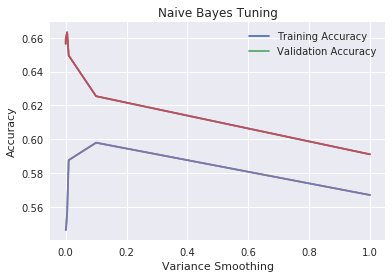

In [104]:
plt.plot(a,train_score)
plt.plot(a,val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Naive Bayes Tuning')
plt.xlabel('Variance Smoothing')
plt.ylabel('Accuracy')
plt.show()

In [105]:
gaussian = GaussianNB(priors=None, var_smoothing=0.1)
nb_model = gaussian.fit(x_train, y_train.values.ravel())

print(nb_model.score(x_test, y_test))

0.6701030927835051


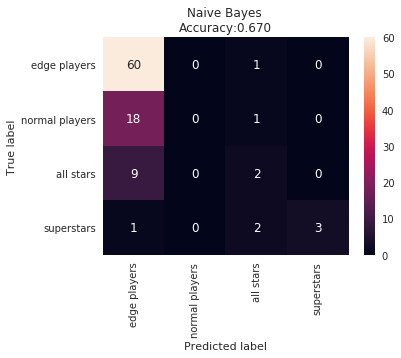

In [106]:
# https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

# 0 - edge players
# 1 - normal players
# 2 - all stars
# 3 - superstars

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

y_predict = nb_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

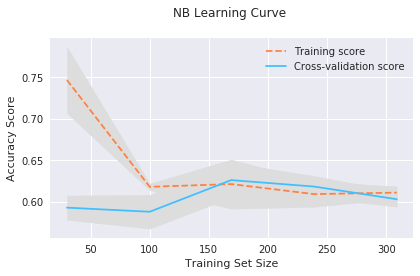

In [107]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(GaussianNB(priors=None, var_smoothing=0.1)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("NB Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [108]:
d_train = []
d_val = []

for i in range(1,24):
    
    X_train_index = X_train.iloc[: , 0:i]
    X_val_index = X_val.iloc[: , 0:i]
    
    classifier = GaussianNB(priors=None, var_smoothing=0.1)
    nb_model = gaussian.fit(X_train_index, Y_train.values.ravel())

    d_train.append(nb_model.score(X_train_index, Y_train))
    d_val.append(nb_model.score(X_val_index, Y_val))

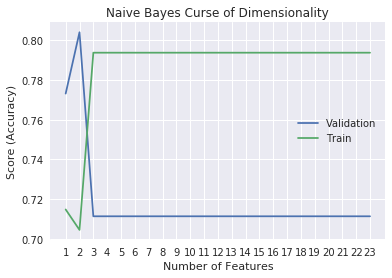

In [109]:
plt.title('Naive Bayes Curse of Dimensionality')
plt.plot(range(1,24),d_val,label="Validation")
plt.plot(range(1,24),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,24))
plt.show()